# I) Data Analysis

-   **Age**: The age of the patient in years.
    
-   **Sex**: The gender of the patient:
    
    -   **M**: Male
    -   **F**: Female
-   **ChestPainType**: The type of chest pain the patient experiences:
    
    -   **TA (Typical Angina)**: Chest pain related to the heart.
    -   **ATA (Atypical Angina)**: Chest pain not usually linked to the heart.
    -   **NAP (Non-Anginal Pain)**: Chest pain unrelated to heart issues.
    -   **ASY (Asymptomatic)**: No chest pain symptoms.
-   **RestingBP**: The patient's blood pressure when resting, measured in millimeters of mercury (**mm Hg**).
    
-   **Cholesterol**: The level of cholesterol in the blood, measured in milligrams per deciliter (**mg/dl**).
    
-   **FastingBS**: Blood sugar levels after fasting:
    
    -   **1**: Blood sugar is above 120 mg/dl.
    -   **0**: Blood sugar is 120 mg/dl or below.
-   **RestingECG**: Results of an electrocardiogram (a test that records the heart's electrical activity):
    
    -   **Normal**: Heart activity appears normal.
    -   **ST**: Abnormal patterns in the heart’s electrical signals.
    -   **LVH**: Possible enlargement or thickening of the heart’s left chamber.
-   **MaxHR**: The maximum heart rate the patient achieved during a test, typically between 60 and 202 beats per minute.
    
-   **ExerciseAngina**: Whether the patient experiences chest pain triggered by exercise:
    
    -   **Y**: Yes
    -   **N**: No
-   **Oldpeak**: A measure of ST-segment depression, which helps assess heart stress during exercise.
    
-   **ST_Slope**: The slope (direction) of the ST-segment during peak exercise:
    
    -   **Up**: Positive slope.
    -   **Flat**: Level or no slope.
    -   **Down**: Negative slope.
-   **HeartDisease**: The final outcome showing if the patient has heart disease:
    
    -   **1**: Has heart disease.
    -   **0**: Normal, no heart disease.

In [1]:
import pandas as pd

In [2]:
#https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("-" * 50)

Unique values in 'Sex':
['M' 'F']
--------------------------------------------------
Unique values in 'ChestPainType':
['ATA' 'NAP' 'ASY' 'TA']
--------------------------------------------------
Unique values in 'RestingECG':
['Normal' 'ST' 'LVH']
--------------------------------------------------
Unique values in 'ExerciseAngina':
['N' 'Y']
--------------------------------------------------
Unique values in 'ST_Slope':
['Up' 'Flat' 'Down']
--------------------------------------------------


In [8]:
import numpy as np
df_num=df.select_dtypes(include=[np.number])
df_cat=df.select_dtypes(include=['object']) 

In [9]:
df_num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [10]:
df_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [11]:
df_cat.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [12]:
df_cat['HeartDisease']=df_num['HeartDisease']

In [13]:
df_cat.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
#change the style of axes
plt.style.use('seaborn-v0_8')

In [21]:
# Predefine the color palette to avoid generating it repeatedly
palette = sns.color_palette("Set2")

In [22]:
# Filter columns to process only categorical data
categorical_columns = [
    column for column in df.columns 
    if df[column].dtype == 'object' or len(df[column].unique()) < 10
]
# Predefine the color palette to avoid generating it repeatedly
palette = sns.color_palette("Set2")

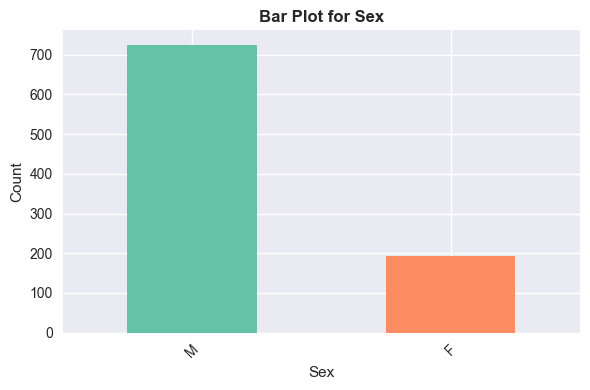

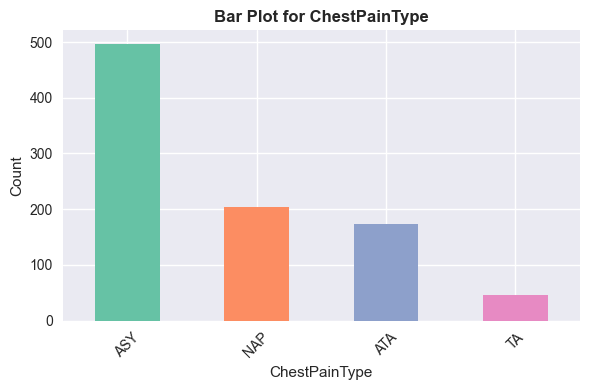

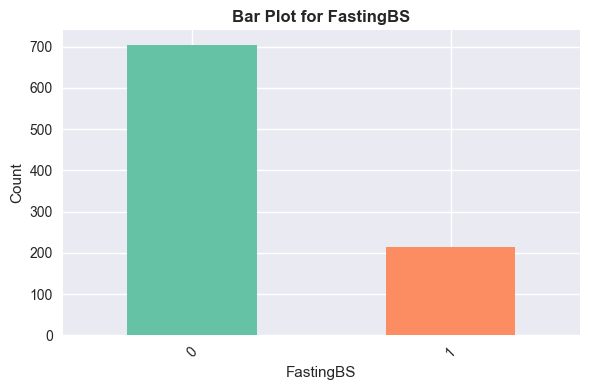

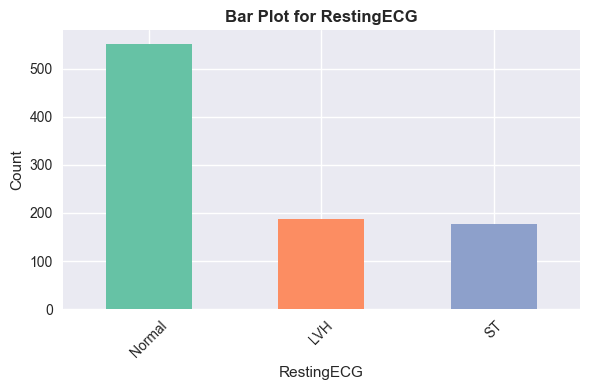

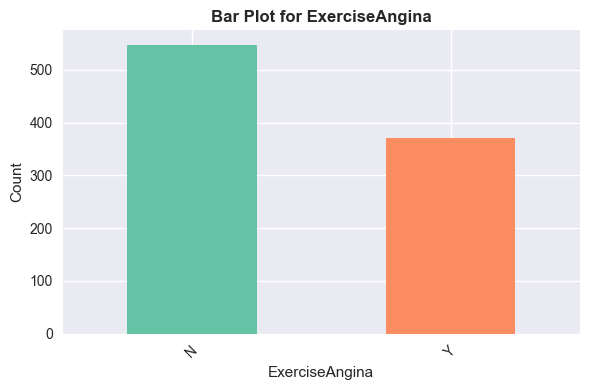

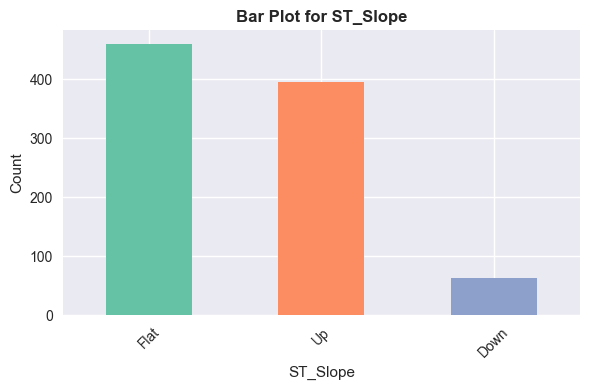

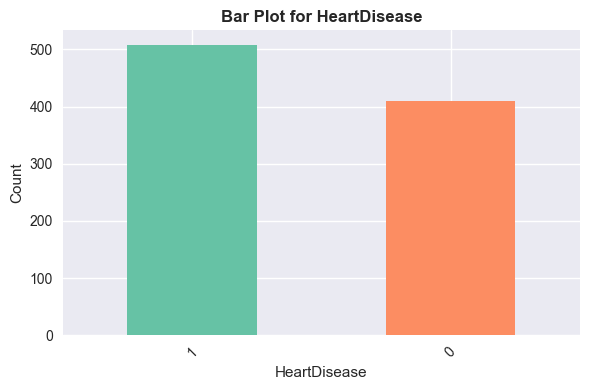

In [23]:
# Loop through categorical columns to create bar plots
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    value_counts = df[column].value_counts()
    # Use a subset of the predefined palette for colors
    colors = palette[:len(value_counts)]
    value_counts.plot(kind='bar', color=colors)
    plt.title(f"Bar Plot for {column}", fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Figure size 600x400 with 0 Axes>

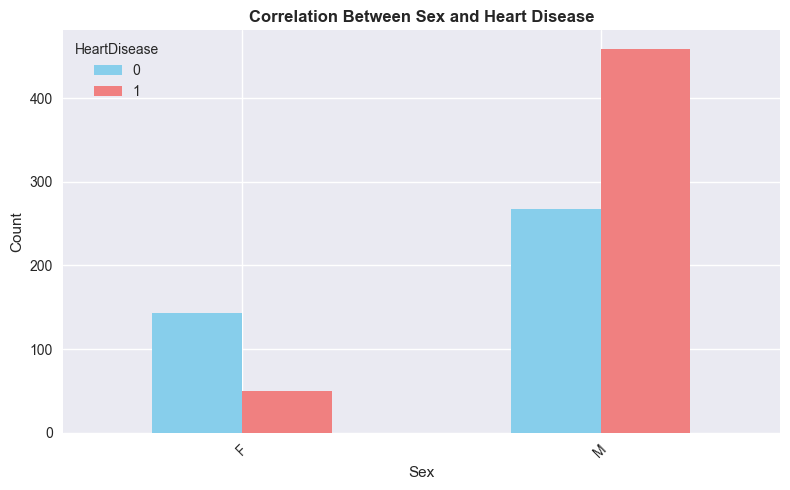

<Figure size 600x400 with 0 Axes>

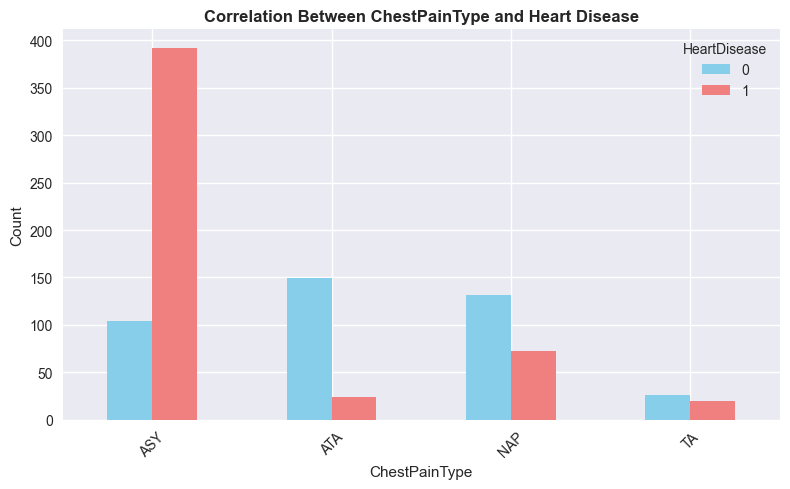

<Figure size 600x400 with 0 Axes>

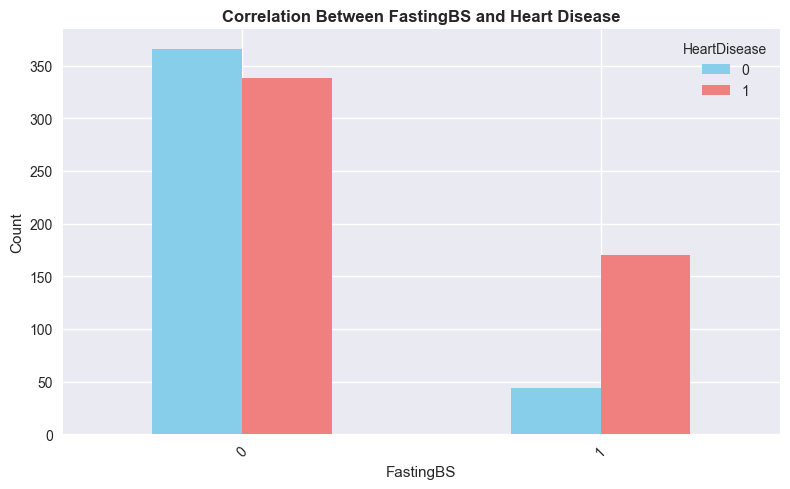

<Figure size 600x400 with 0 Axes>

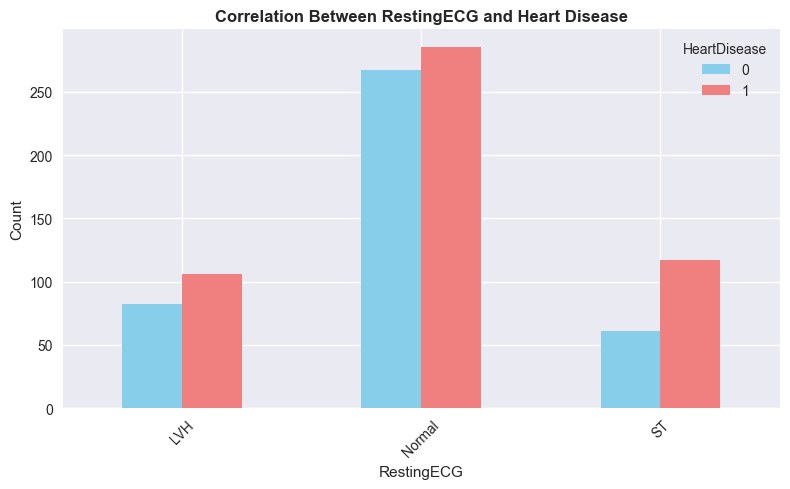

<Figure size 600x400 with 0 Axes>

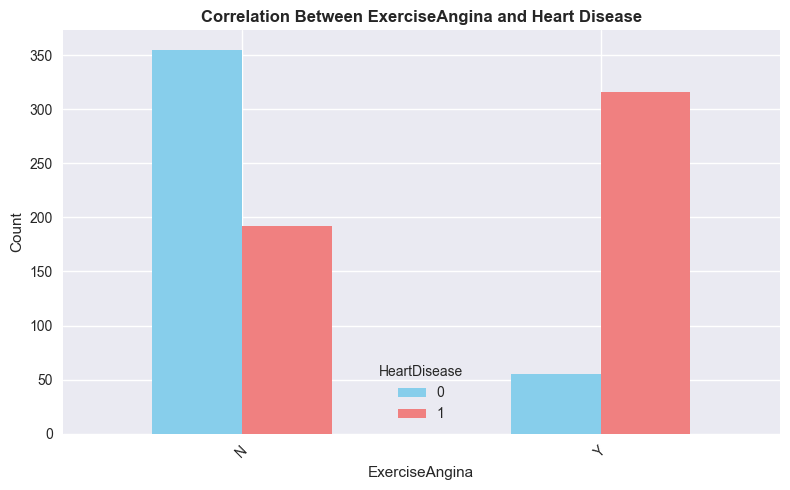

<Figure size 600x400 with 0 Axes>

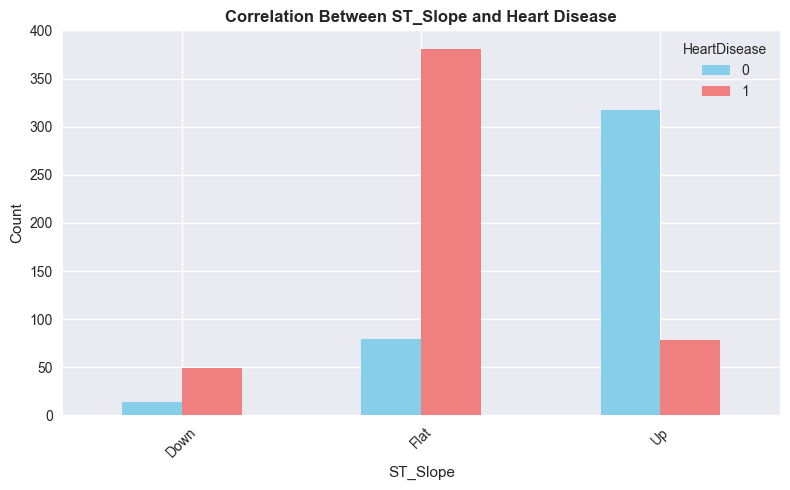

In [24]:
# List of columns to include ('Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak')
heart_relevant_columns = [col for col in df.columns if col not in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

# Loop through each column to create bar plots for the correlation with 'HeartDisease'
for column in heart_relevant_columns:
    if column != 'HeartDisease':  # Skip the 'HeartDisease' column itself
        plt.figure(figsize=(6, 4))
        
        # Group by 'heart disease' and the current column, then count occurrences
        cross_tab = pd.crosstab(df[column], df['HeartDisease'])
        
        # Plot the bar chart
        cross_tab.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'], figsize=(8, 5))
        
        # Set the title and labels
        plt.title(f"Correlation Between {column} and Heart Disease", fontweight='bold')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        # Show the plot
        plt.tight_layout()
        plt.show()


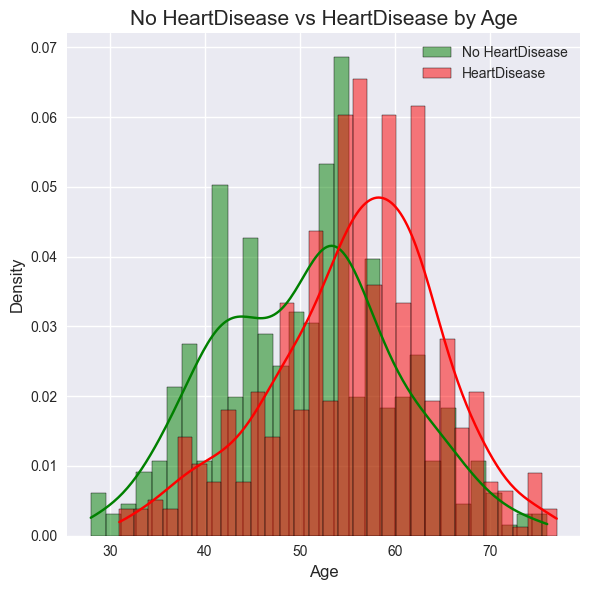

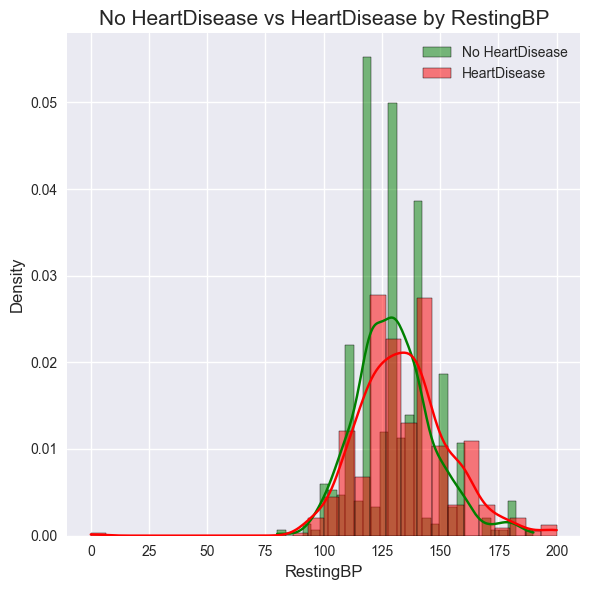

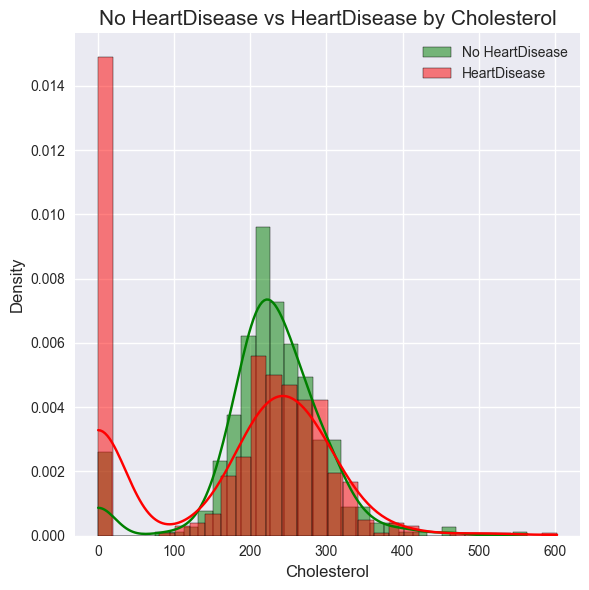

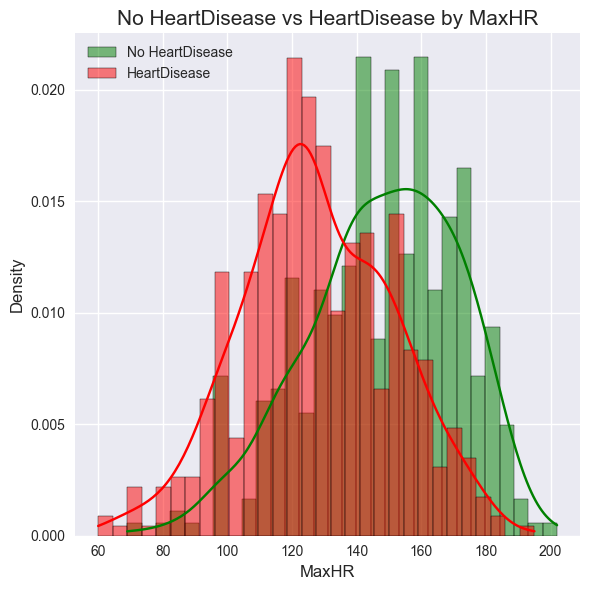

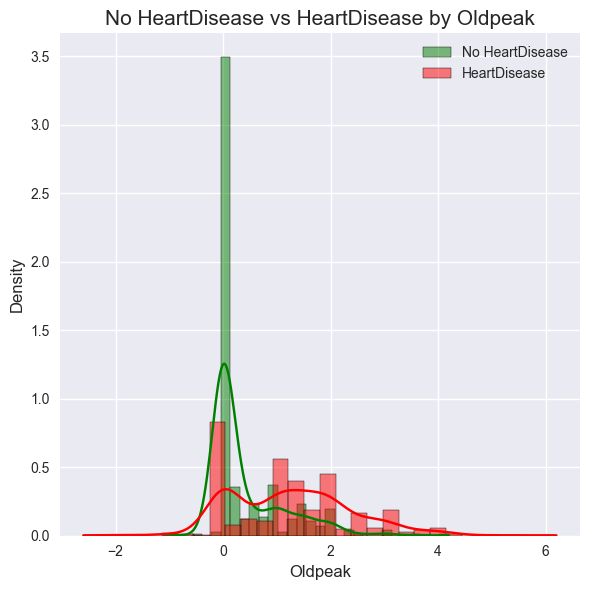

In [25]:
columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in columns_to_plot:
    plt.figure(figsize=(6, 6))
    
    # Plot distribution for 'HeartDisease' == 0 (No HeartDisease)
    sns.histplot(df[df['HeartDisease'] == 0][col], color='green', kde=True, label='No HeartDisease', bins=30, stat='density')
    
    # Plot distribution for 'HeartDisease' == 1 (HeartDisease)
    sns.histplot(df[df['HeartDisease'] == 1][col], color='red', kde=True, label='HeartDisease', bins=30, stat='density')
    
    # Add title and labels
    plt.title(f'No HeartDisease vs HeartDisease by {col}', fontsize=15)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

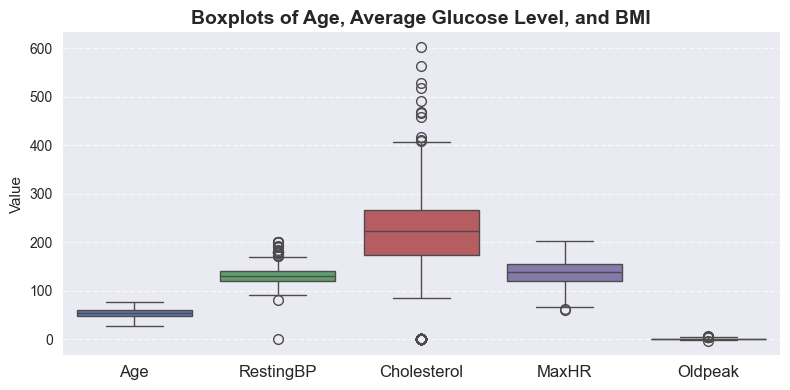

In [26]:
def boxplots(data):
    # Select the columns to visualize
    columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    
    # Create a boxplot for each column
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data[columns_to_plot])
    plt.title("Boxplots of Age, Average Glucose Level, and BMI", fontweight='bold', fontsize=14)
    plt.ylabel("Value")
    plt.xticks(ticks=range(len(columns_to_plot)), labels=columns_to_plot, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
boxplots(df)

In [27]:
# Processing Outliner Data
def handle_outliers(df, columns):
    """
    Function to handle outlier data by removing values outside the IQR (Interquartile Range).
    
    Parameters:
    df (DataFrame): DataFrame containing the data.
    columns (list): List of columns to process for outliers.
    
    Returns:
    DataFrame: DataFrame with outliers handled.
    """
    for column in columns:
        # Caculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Caculate the upper and lower limit
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove values outside IQR range
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [29]:
data_no_outliers= handle_outliers(df, ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])

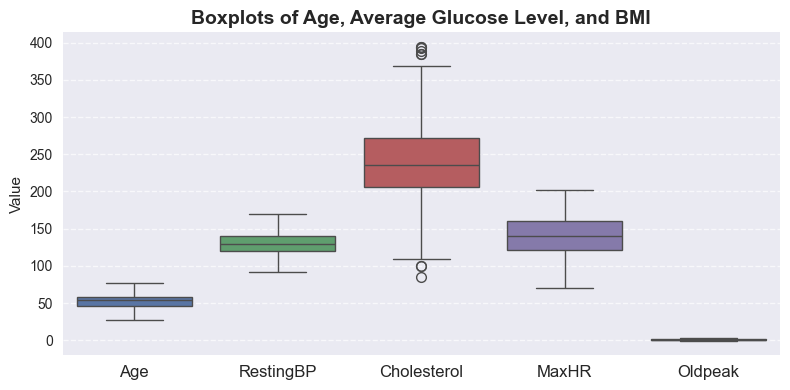

In [30]:
boxplots(data_no_outliers)

In [14]:
from scipy.stats import chi2_contingency

In [15]:
chi2_results = {}
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    contingency_table = pd.crosstab(df_cat[col], df_cat['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = p

In [16]:
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'P-Value'])
chi2_df['Significant'] = chi2_df['P-Value'] < 0.05  # Mark significant relationships
print(chi2_df)

          Feature       P-Value  Significant
0             Sex  4.597617e-20         True
1   ChestPainType  8.083728e-58         True
2      RestingECG  4.229233e-03         True
3  ExerciseAngina  2.907808e-50         True
4        ST_Slope  5.167638e-78         True
